## Organize
**we will take the raw data and analyze the dataset by finding relationships between the featurs and target values.**

In [17]:
# imports

import pandas as pd
import numpy as np
import os
import os.path as op

In [2]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
working_data_path = os.path.join(raw_data_path, 'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print(working_data_path)

../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [4]:
working_data_df = pd.read_csv(working_data_path, index_col='EmployeeNumber')

## ***Observations***

   - There is no missing values in any of the column. 
   - There are total 1470 rows. 
   - There are total 9 columns which are categorical feature of the type object.
   
   ## Re-Arrange the Column. Keep the Target values Attrition at the end.

In [5]:
working_data_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [27]:
group1 = ['Age']

group2 = ['BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

group3 = ['Attrition']

In [28]:
new_cols = group1 + group2 + group3

In [29]:
work_df = working_data_df[new_cols]

In [30]:
work_df.head()

Age     BusinessTravel  DailyRate              Department  \
EmployeeNumber                                                              
1                41      Travel_Rarely       1102                   Sales   
2                49  Travel_Frequently        279  Research & Development   
4                37      Travel_Rarely       1373  Research & Development   
5                33  Travel_Frequently       1392  Research & Development   
7                27      Travel_Rarely        591  Research & Development   

                DistanceFromHome  Education EducationField  EmployeeCount  \
EmployeeNumber                                                              
1                              1          2  Life Sciences              1   
2                              8          1  Life Sciences              1   
4                              2          2          Other              1   
5                              3          4  Life Sciences              1   
7                              2          1        Medical              1   

                EnvironmentSatisfaction  Gender  ...  StandardHours  \
EmployeeNumber                                   ...                  
1                                     2  Female  ...             80   
2                                     3    Male  ...             80   
4                                     4    Male  ...             80   
5                                     4  Female  ...             80   
7                                     1    Male  ...             80   

                StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
EmployeeNumber                                                              
1                              0                  8                     0   
2                              1                 10                     3   
4                              0                  7                     3   
5                              0                  8                     3   
7                              1                  6                     3   

                WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
EmployeeNumber                                                       
1                             1              6                   4   
2                             3             10                   7   
4                             3              0                   0   
5                             3              8                   7   
7                             3              2                   2   

                YearsSinceLastPromotion  YearsWithCurrManager Attrition  
EmployeeNumber                                                           
1                                     0                     5       Yes  
2                                     1                     7        No  
4                                     0                     0       Yes  
5                                     3                     0        No  
7                                     2                     2        No  

[5 rows x 34 columns]

## Assign the Attrition value to 0 or 1 in place of yes or no

**Method One**

In [31]:
work_df['Attrition'] = work_df['Attrition'].str.lower().replace({'yes': 1, 'no':0})
work_df.head()

Age     BusinessTravel  DailyRate              Department  \
EmployeeNumber                                                              
1                41      Travel_Rarely       1102                   Sales   
2                49  Travel_Frequently        279  Research & Development   
4                37      Travel_Rarely       1373  Research & Development   
5                33  Travel_Frequently       1392  Research & Development   
7                27      Travel_Rarely        591  Research & Development   

                DistanceFromHome  Education EducationField  EmployeeCount  \
EmployeeNumber                                                              
1                              1          2  Life Sciences              1   
2                              8          1  Life Sciences              1   
4                              2          2          Other              1   
5                              3          4  Life Sciences              1   
7                              2          1        Medical              1   

                EnvironmentSatisfaction  Gender  ...  StandardHours  \
EmployeeNumber                                   ...                  
1                                     2  Female  ...             80   
2                                     3    Male  ...             80   
4                                     4    Male  ...             80   
5                                     4  Female  ...             80   
7                                     1    Male  ...             80   

                StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
EmployeeNumber                                                              
1                              0                  8                     0   
2                              1                 10                     3   
4                              0                  7                     3   
5                              0                  8                     3   
7                              1                  6                     3   

                WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
EmployeeNumber                                                       
1                             1              6                   4   
2                             3             10                   7   
4                             3              0                   0   
5                             3              8                   7   
7                             3              2                   2   

                YearsSinceLastPromotion  YearsWithCurrManager Attrition  
EmployeeNumber                                                           
1                                     0                     5         1  
2                                     1                     7         0  
4                                     0                     0         1  
5                                     3                     0         0  
7                                     2                     2         0  

[5 rows x 34 columns]

In [32]:
work_df['OverTime'] = work_df['OverTime'].str.lower().replace({'yes':1, 'no':0})

In [33]:
work_df['Gender'] = work_df['Gender'].str.lower().replace({'male':1,'female':0})

## User Pandas_Profiling to know the highly correlated features and also the features which can be rejected straight away. 

In [14]:
import pandas_profiling
pandas_profiling.ProfileReport(work_df)

## remove not required column
1. We can see above EmployeeCount, MonthlyIncome, Over18 and StandardHours are rejected and they are not required. We can remove them. 

In [36]:
work_df.drop(['EmployeeCount', 'MonthlyIncome', 'Over18', 'StandardHours'], axis='columns', inplace=True)

In [37]:
type(work_df)

pandas.core.frame.DataFrame

In [38]:
work_df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
Gender                   -0.036311  -0.011716         -0.001851  -0.016547   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
OverTime                  0.028062   0.009135          0.025514  -0.020322   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   
Attrition                -0.159205  -0.056652          0.077924  -0.031373   

                          EnvironmentSatisfaction    Gender  HourlyRate  \
Age                                      0.010146 -0.036311    0.024287   
DailyRate                                0.018355 -0.011716    0.023381   
DistanceFromHome                        -0.016075 -0.001851    0.031131   
Education                               -0.027128 -0.016547    0.016775   
EnvironmentSatisfaction                  1.000000  0.000508   -0.049857   
Gender                                   0.000508  1.000000   -0.000478   
HourlyRate                              -0.049857 -0.000478    1.000000   
JobInvolvement                          -0.008278  0.017960    0.042861   
JobLevel                                 0.001212 -0.039403   -0.027853   
JobSatisfaction                         -0.006784  0.033252   -0.071335   
MonthlyRate                              0.037600 -0.041482   -0.015297   
NumCompaniesWorked                       0.012594 -0.039147    0.022157   
OverTime                                 0.070132 -0.041924   -0.007782   
PercentSalaryHike                       -0.031701  0.002733   -0.009062   
PerformanceRating                       -0.029548 -0.013859   -0.002172   
RelationshipSatisfaction                 0.007665  0.022868    0.001330   
StockOptionLevel                         0.003432  0.012716    0.050263   
TotalWorkingYears                       -0.002693 -0.046881   -0.002334   
TrainingTimesLastYear                   -0.019359 -0.038787   -0.008548   
WorkLifeBalance                          0.027627 -0.002753   -0.004607   
YearsAtCompany                           0.001458 -0.029747   -0.019582   
YearsInCurrentRole                       0.018007 -0.041483   -0.024106   
YearsSinceLastPromotion                  0.016194 -0.026985   -0.026716   
YearsWithCurrManager                    -0.004999 -0.030599   -0.020123   
Attrition                               -0.103369  0.029453   -0.006846   

                          JobInvolvement  JobLevel 

In [42]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null int64
PercentSalaryHike       

### List all categorical columns and there unique values

In [40]:
categorical_col = []
for column in work_df.columns:
    if work_df[column].dtype == object and len(work_df[column].unique())<=50:
        categorical_col.append(column)
        print(f"{column} : {work_df[column].unique()}")
        print("----------------------------------")
        

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
----------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
----------------------------------
MaritalStatus : ['Single' 'Married' 'Divorced']
----------------------------------


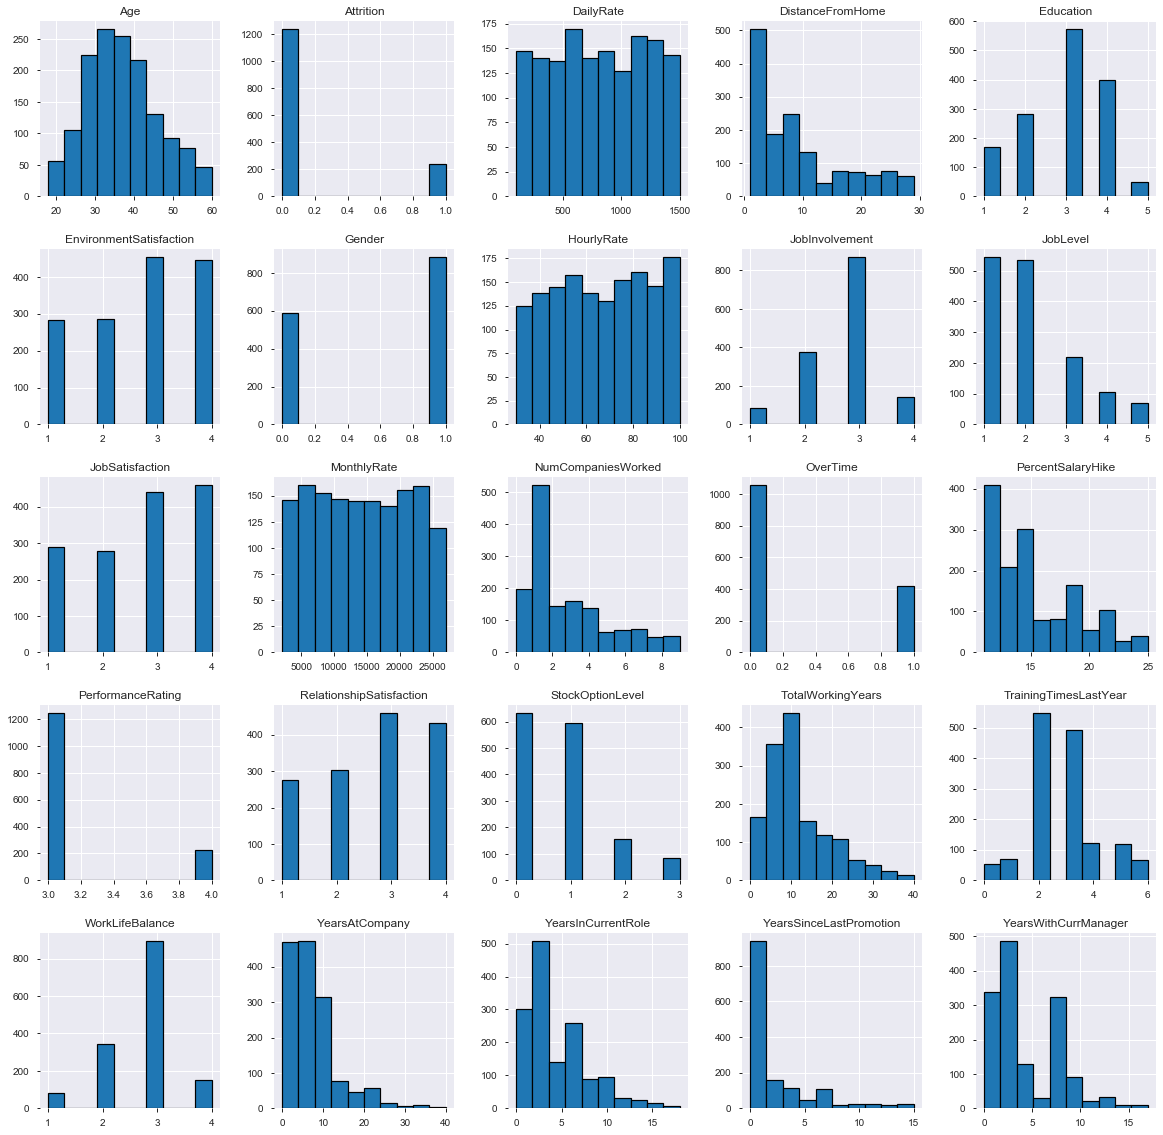

In [41]:
# Visulazing the distibution of the data for every feature
work_df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

## Plot every categorical feature with target value - Correlation

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

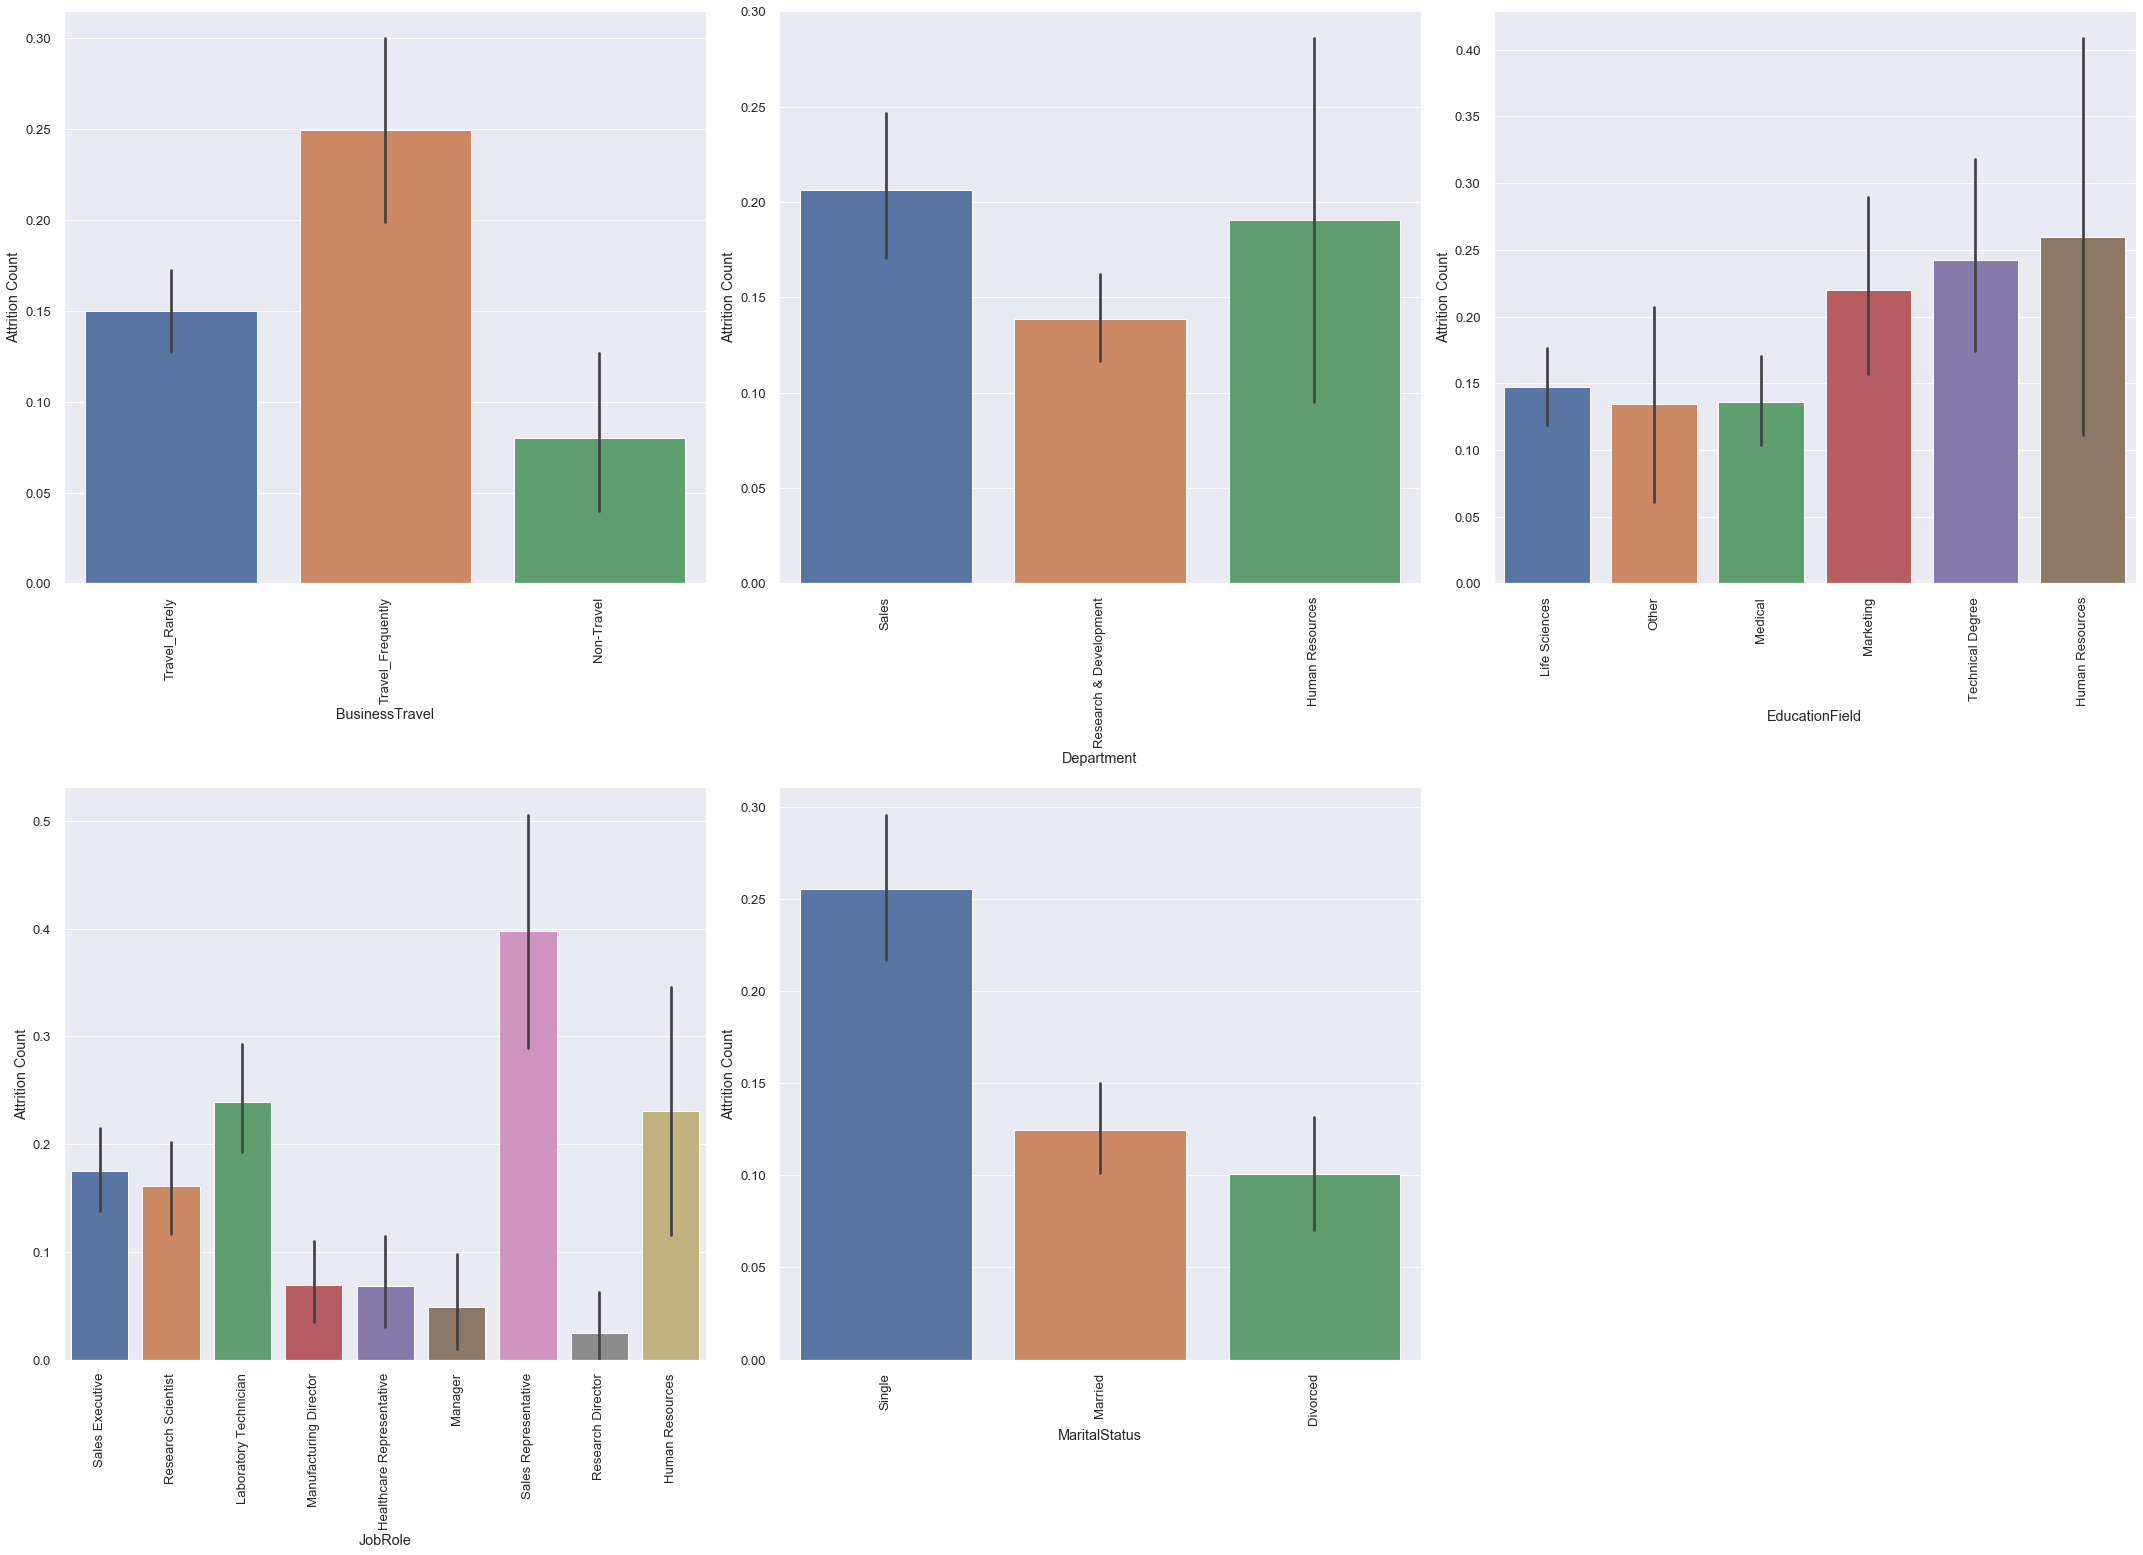

In [50]:
import seaborn as sns

sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=work_df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')
    
plt.tight_layout()
plt.show()

## Categorical feature Analysis - Conclusions
 - **Business Travel**:  Frequent buiness travelers are more likely to resign. Non travlers are less likely to resign. 
 - **Department**: Sales department employees are more likely to resign than the R&D
 - **EducationField**: Medicals and other deparments are more likely to stay with the company than the human resource and technical degree. 
 - **JobRole**: Sales Representative are the onces who changes job frequently. 
 - **MaritalStatus**: singles are more likely to quit the job than maried and Divorced.
 
 ## Correlation matrix with heatmap
 

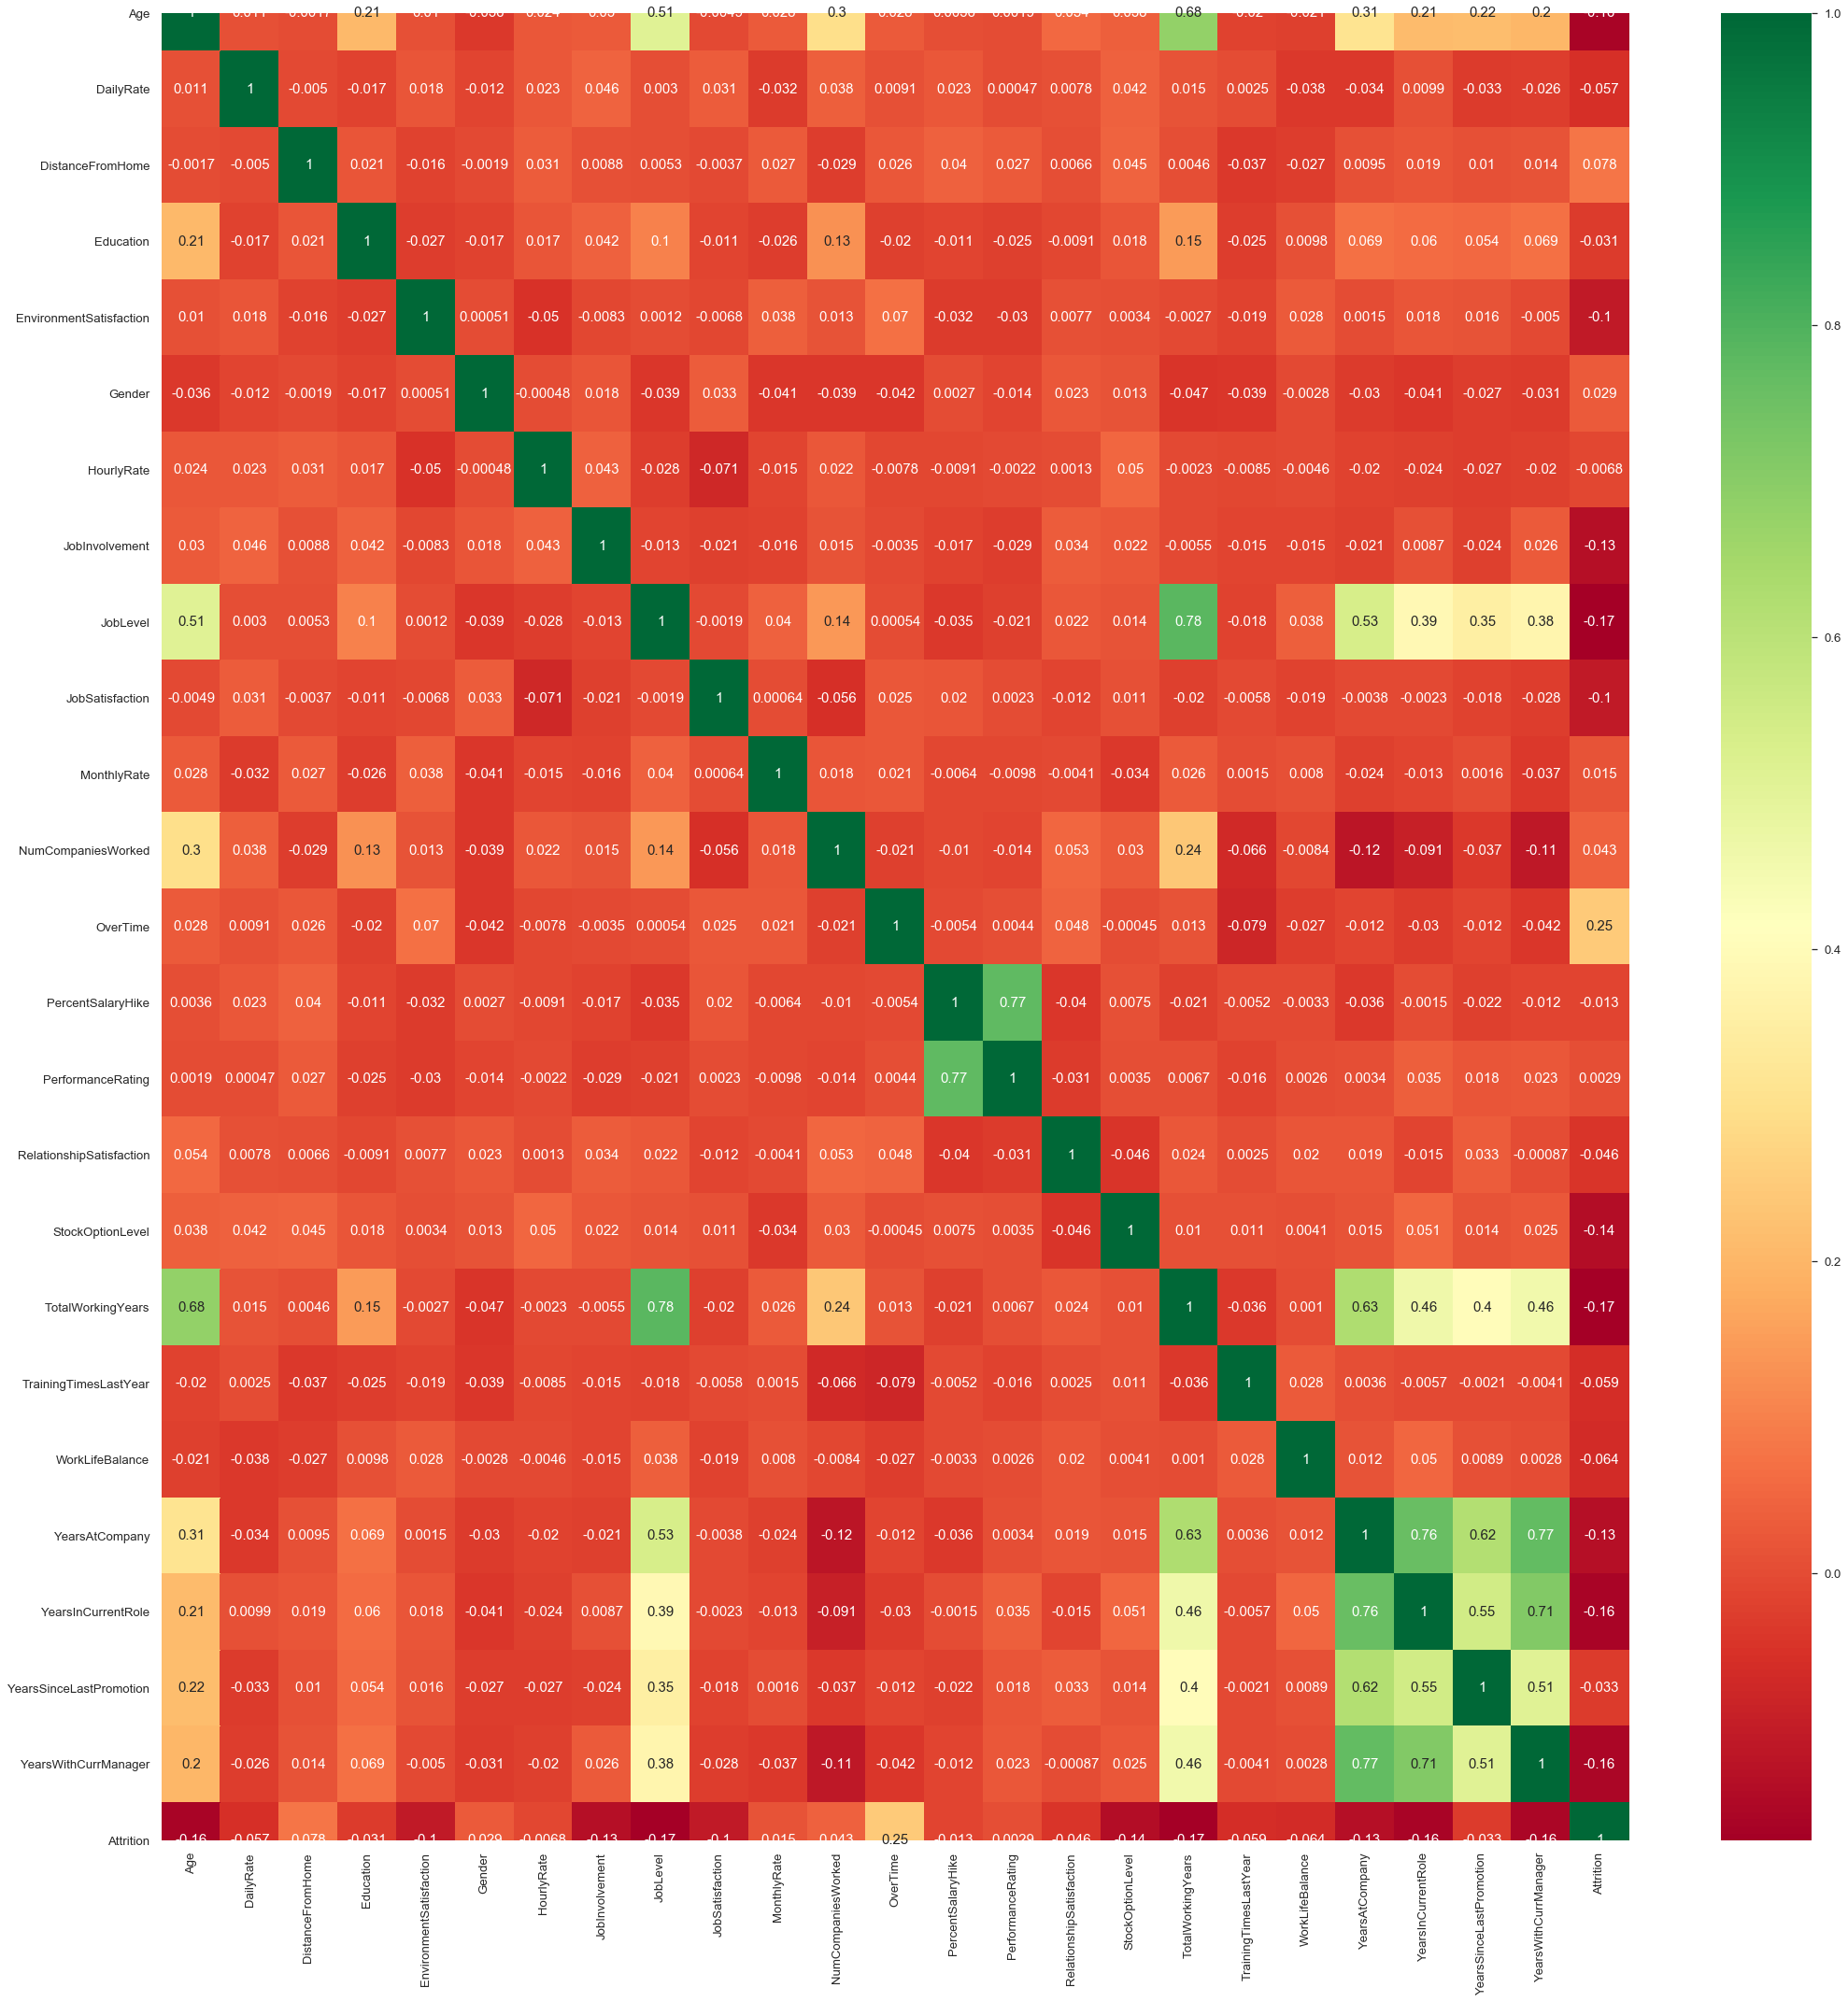

In [52]:
plt.figure(figsize=(30, 30))
sns.heatmap(work_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.tight_layout()
plt.show()

### perform categorical feature encoding(One Hot Encoding) using pandas dummies. 

In [53]:
work_df = pd.get_dummies(work_df, columns = categorical_col)

In [54]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 49 columns):
Age                                  1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
OverTime                             1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1

## Copy the processed data in the data/processed folder
### Before that reorder the column so that Attrition will be at the beginning. 
 - Its good to keepy target value either at the begning or at the end. 

In [58]:
columns = [column for column in work_df.columns if column != 'Attrition']
columns = ['Attrition'] + columns
work_df = work_df[columns]

In [59]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 49 columns):
Attrition                            1470 non-null int64
Age                                  1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
OverTime                             1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1

In [60]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_data_path = os.path.join(processed_data_path, 'processed_WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [61]:
work_df.to_csv(write_data_path)

## Create a reexecutable script to preprocess data.
 - This is required so that we do not have to perform each step again in the jupyter notebook. we can execute all the required steps at one go to preprocess this data. 

In [62]:
#create a python file where preprocessed script will be written. 
get_processed_data_script_file = os.path.join(os.path.pardir, 'src', 'data', 'get_processed_data.py')

In [65]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
    working_data_path = os.path.join(raw_data_path, 'WA_Fn-UseC_-HR-Employee-Attrition.csv')
    work_df = pd.read_csv(working_data_path, index_col='EmployeeNumber')
    return work_df


def process_data(df):
    return (df
            .pipe(categorical_binary)
            .pipe(categorical_onehot)
            .pipe(reorder_column)
            .drop(['EmployeeCount', 'MonthlyIncome', 'Over18', 'StandardHours'], axis=1)
           )
            

def reorder_column(work_df):
    columns = [column for column in work_df.columns if column != 'Attrition']
    columns = ['Attrition'] + columns
    work_df = work_df[columns]
    return work_df

def categorical_onehot(work_df):
    categorical_col = []
    for column in work_df.columns:
        if work_df[column].dtype == object and len(work_df[column].unique())<=50:
            categorical_col.append(column)
                
    work_df = pd.get_dummies(work_df, columns = categorical_col)
    return work_df

def categorical_binary(work_df):
    work_df['Attrition'] = work_df['Attrition'].str.lower().replace({'yes': 1, 'no':0})
    work_df['Gender'] = work_df['Gender'].str.lower().replace({'male':1,'female':0})
    work_df['OverTime'] = work_df['OverTime'].str.lower().replace({'yes':1, 'no':0})
    return work_df

def write_data(df):
    processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
    write_data_path = os.path.join(processed_data_path, 'processed_Data_Employee-Attrition.csv')
    df.to_csv(write_data_path)


if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)


Overwriting ../src/data/get_processed_data.py


In [66]:
!python $get_processed_data_script_file

  File "../src/data/get_processed_data.py", line 31
    categorical_col.append(column)
                  ^
IndentationError: expected an indented block


In [31]:
pd.crosstab(work_df.Attrition, work_df.BusinessTravel)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                      138                208            887
1                       12                 69            156

In [33]:
pd.crosstab(work_df.Attrition, work_df.Department)

Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92

In [34]:
pd.crosstab(work_df.Attrition, work_df.EducationField)

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
0                            20            517        124      401     71   
1                             7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
0                            100  
1                             32

In [35]:
pd.crosstab(work_df.Attrition, work_df.JobRole)

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
0                                122               40                    197   
1                                  9               12                     62   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
0               97                     135                 78   
1                5                      10                  2   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
0                         245              269                    50  
1                          47               57                    33

In [36]:
pd.crosstab(work_df.Attrition, work_df.MaritalStatus)

MaritalStatus  Divorced  Married  Single
Attrition                               
0                   294      589     350
1                    33       84     120

In [37]:
#perform categorical feature encoding(One Hot Encoding) using pandas dummies. 
work_df = pd.get_dummies(work_df, columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])


In [38]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 49 columns):
Age                                  1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
OverTime                             1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1

In [39]:
work_df.head()

Age  DailyRate  DistanceFromHome  Education  \
EmployeeNumber                                                
1                41       1102                 1          2   
2                49        279                 8          1   
4                37       1373                 2          2   
5                33       1392                 3          4   
7                27        591                 2          1   

                EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
EmployeeNumber                                                                
1                                     2       0          94               3   
2                                     3       1          61               2   
4                                     4       1          92               2   
5                                     4       0          56               3   
7                                     1       1          40               3   

                JobLevel  JobSatisfaction  ...  JobRole_Laboratory Technician  \
EmployeeNumber                             ...                                  
1                      2                4  ...                              0   
2                      2                2  ...                              0   
4                      1                3  ...                              1   
5                      1                3  ...                              0   
7                      1                2  ...                              1   

                JobRole_Manager  JobRole_Manufacturing Director  \
EmployeeNumber                                                    
1                             0                               0   
2                             0                               0   
4                             0                               0   
5                             0                               0   
7                             0                               0   

                JobRole_Research Director  JobRole_Research Scientist  \
EmployeeNumber                                                          
1                                       0                           0   
2                                       0                           1   
4                                       0                           0   
5                                       0                           1   
7                                       0                           0   

                JobRole_Sales Executive  JobRole_Sales Representative  \
EmployeeNumber                                                          
1                                     1                             0   
2                                     0                             0   
4                                     0                             0   
5                                     0                             0   
7                                     0                             0   

                MaritalStatus_Divorced  MaritalStatus_Married  \
EmployeeNumber                                                  
1                                    0                      0   
2                                    0                      1   
4                                    0                      0   
5                                    0                      1   
7                                    0                      1   

                MaritalStatus_Single  
EmployeeNumber                        
1                                  1  
2                                  0  
4                                  1  
5                                  0  
7                                  0  

[5 rows x 49 columns]